# snakeviz is a good tool for measuring time

In [1]:
# %matplotlib widget
%pylab inline
# pylab.rcParams['figure.figsize'] = (8, 8)
import  general.utils as utils
import result_analyse.resultloader
import result_analyse.visualisation as vs

from ipywidgets import interact, interactive, fixed, interact_manual

@interact
def result_selector(file=result_analyse.resultloader.get_runs()):
    if(file==None):return
    print('Analysing ',file)
    run_info,dataset,evalres=utils.loadState(file)
    for i in range(len(evalres)):
        evaldata=evalres[i]['test']
        quality=evaldata.quality
        print('Evalution quality fold=%d is %s' % (i, quality))
        print('func%s' % (evaldata.functions))
        
    #vs.visualize(dataset)
    print(len(dataset.sensor_events))
#     vs.plot_per_act(dataset,evalres)
    vs.plot_CM(dataset,evalres)
    for i in range(len(evalres)):
        evaldata=evalres[i]['test']
        # vs.my_result_analyse(evalres[i].real_events,evalres[i].pred_events)
#         vs.plotJoinAct(dataset,evaldata.real_events,evaldata.pred_events)




Populating the interactive namespace from numpy and matplotlib


interactive(children=(Dropdown(description='file', options=(('meta_dataset 220602_15-19-15-A4H', 'meta_dataset…

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy



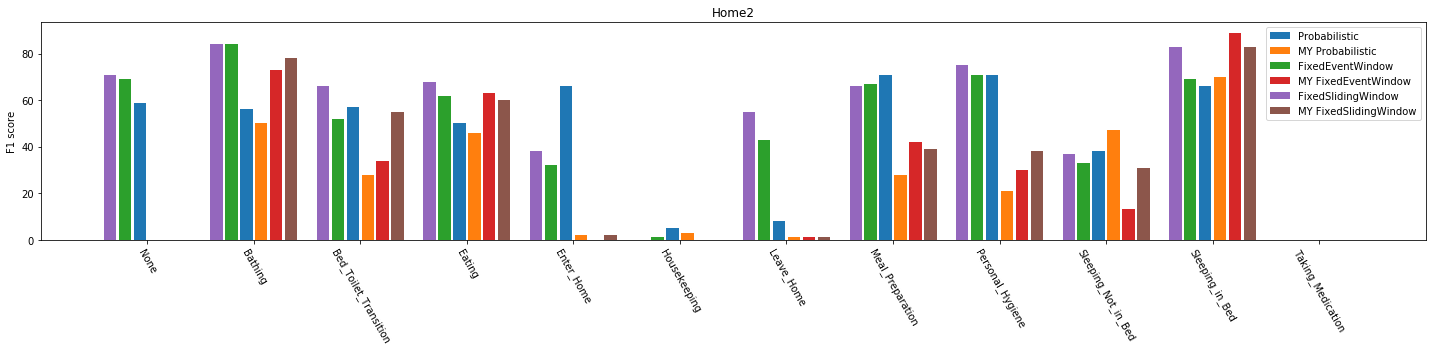

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 3)
import  general.utils as utils
import result_analyse.resultloader
import result_analyse.visualisation as vs

from ipywidgets import interact, interactive, fixed, interact_manual

def get_my_eval(data_dscr='Home2',reqinfo=[],hide=['SimpleKeras','SimpleFeatureExtraction']):
    import os
    import pandas as pd
    list=os.listdir('save_data/')
    list.sort(key=lambda f:os.path.getmtime('save_data/'+f),reverse=True)
    result={}
    dataset=None
    for item in list:
#         print(item)
        if not (data_dscr in item):continue
        try:
            res=utils.loadState(item)
            if(len(res)!=3):
                #raise Error
                logger.warn('File %s can not import'%item)
                continue
            [run_info,datasetdscr,evalres]=res
            name=evalres[0]['test'].shortrunname.split('_')
#             print(name)
            name=name[1]
            if not(datasetdscr.data_dscr==data_dscr):continue
            
            for r in reqinfo:
                if not(r in evalres[0]['test'].shortrunname):
                    #print(r)
                    continue
#             tbl=getRunTable(run_info,datasetdscr,evalres)
            
            
            result[name]=evalres
            dataset=datasetdscr
        except Exception as e:
            print('File %s can not import error '%item)
            import sys
            import traceback
            print(e, file=sys.stderr)
            traceback.print_exc()

    return dataset,result


dataset,myevalres=get_my_eval()
vs.plot_per_act(dataset,myevalres)

In [ ]:
c